# Let's create an updated version of the Pokemon classifier and export it to a .pkl file

To start, we'll import the necessary libraries and load the dataset from HuggingFace

In [1]:
%pip install -Uqq fastai datasets duckduckgo_search fastdownload

from datasets import load_dataset
dataSet = load_dataset("keremberke/pokemon-classification", name="full")



Note: you may need to restart the kernel to use updated packages.


### Load an example image data from the dataset

In [2]:
dataSet = dataSet.shuffle() # shuffle the data
example = dataSet['train'][0]

example['image'] = 'the actual image data'

import json

## print the example keys
print(json.dumps(example, indent=2))

{
  "image_file_path": "/Users/simonoob/.cache/huggingface/datasets/downloads/extracted/22d4eb654c67e4b50f18e03b2f4cb7217b5f0fb7fda5beb14b7309203df3424b/Poliwag/847e77bf12e84a0fad43f4fd70005888_jpg.rf.5c9d2f30bb5f2ff8fe43e6908e194f6a.jpg",
  "image": "the actual image data",
  "labels": 63
}


### Get the labels names from the dataset

In [3]:
## get the categories names
textLabels = dataSet['train'].features['labels'].names
print(textLabels)

['Porygon', 'Goldeen', 'Hitmonlee', 'Hitmonchan', 'Gloom', 'Aerodactyl', 'Mankey', 'Seadra', 'Gengar', 'Venonat', 'Articuno', 'Seaking', 'Dugtrio', 'Machop', 'Jynx', 'Oddish', 'Dodrio', 'Dragonair', 'Weedle', 'Golduck', 'Flareon', 'Krabby', 'Parasect', 'Ninetales', 'Nidoqueen', 'Kabutops', 'Drowzee', 'Caterpie', 'Jigglypuff', 'Machamp', 'Clefairy', 'Kangaskhan', 'Dragonite', 'Weepinbell', 'Fearow', 'Bellsprout', 'Grimer', 'Nidorina', 'Staryu', 'Horsea', 'Electabuzz', 'Dratini', 'Machoke', 'Magnemite', 'Squirtle', 'Gyarados', 'Pidgeot', 'Bulbasaur', 'Nidoking', 'Golem', 'Dewgong', 'Moltres', 'Zapdos', 'Poliwrath', 'Vulpix', 'Beedrill', 'Charmander', 'Abra', 'Zubat', 'Golbat', 'Wigglytuff', 'Charizard', 'Slowpoke', 'Poliwag', 'Tentacruel', 'Rhyhorn', 'Onix', 'Butterfree', 'Exeggcute', 'Sandslash', 'Pinsir', 'Rattata', 'Growlithe', 'Haunter', 'Pidgey', 'Ditto', 'Farfetchd', 'Pikachu', 'Raticate', 'Wartortle', 'Vaporeon', 'Cloyster', 'Hypno', 'Arbok', 'Metapod', 'Tangela', 'Kingler', 'Exeg

## Augment the dataset with images from the internet

In [4]:
# For each label, get 5 images from duckduckgo

from duckduckgo_search import DDGS

from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
import os


def search_images(term):
    print(f"Searching for '{term}'")
    return L(DDGS().images(term))



# For each label, get 5 images from duckduckgo

for label in textLabels:
    labelPath = Path('pokemonImages')/label
    # if path exists and it has more than 5 images, skip it
    if os.path.exists(labelPath) and len(os.listdir(labelPath)) > 5:
        print(f"Skipping {label}, already downloaded")
        continue

    images = search_images(f"{label} pokemon inurl:{label.lower()}")
    print(f"Found {len(images)} images for {label}")
    imagesObjs = []
    for image in images[0:10]:
        # add the image to the dataset
        path = Path('pokemonImages')/label
        path = path/(label + str(images.index(image)) + '.jpg')

        if os.path.exists(path):
            print(f"Skipping {path}, already downloaded")
            continue

        # if the call fails, skip the image
        try:
            dest = download_url(image['image'], path, show_progress=False)
            # imagesObjs.append({'image_file_path': dest, 'labels': textLabels.index(label)})
            print(f"Downloaded {dest}")
        except:
            continue

    # dataSet['train'] =  concat(dataSet['train'], imagesObjs) 
    # print(f"Added {len(imagesObjs)} images for {label}, new dataset size: {len(dataSet['train'])}")

    print('------------------------')
    print(f"{textLabels.index(label)+1}/{len(textLabels)}")
    print('------------------------')



# verify the downloaded images and resize them to 224x224
failed = verify_images(get_image_files(Path('pokemonImages')/label))
failed.map(Path.unlink)
len(f"Removed {len(failed)} images")


Skipping Porygon, already downloaded
Skipping Goldeen, already downloaded
Skipping Hitmonlee, already downloaded
Skipping Hitmonchan, already downloaded
Skipping Gloom, already downloaded
Skipping Aerodactyl, already downloaded
Skipping Mankey, already downloaded
Skipping Seadra, already downloaded
Skipping Gengar, already downloaded
Skipping Venonat, already downloaded
Skipping Articuno, already downloaded
Skipping Seaking, already downloaded
Skipping Dugtrio, already downloaded
Skipping Machop, already downloaded
Skipping Jynx, already downloaded
Skipping Oddish, already downloaded
Skipping Dodrio, already downloaded
Skipping Dragonair, already downloaded
Skipping Weedle, already downloaded
Skipping Golduck, already downloaded
Skipping Flareon, already downloaded
Skipping Krabby, already downloaded
Skipping Parasect, already downloaded
Skipping Ninetales, already downloaded
Skipping Nidoqueen, already downloaded
Skipping Kabutops, already downloaded
Skipping Drowzee, already download

16

### sanitize the data

In [5]:
# loop through the label forlders and delete additional forlders
for label in textLabels:
    path = Path('pokemonImages')/label
    for file in os.listdir(path):
        ## if it's a folder, delete it
        if os.path.isdir(path/file):
            os.rmdir(path/file)
            print(f"Removed {path/file}")

        # try to open the image, if it fails, delete it
        try:
            img = Image.open(path/file).load()
        except:
            os.remove(path/file)
            print(f"Removed {path/file}")

### Add the new images to the dataset


In [ ]:
for label in textLabels:
    path = Path('pokemonImages')/label
    for file in os.listdir(path):
        obj = {'image_file_path': path/file, 'labels': textLabels.index(label)}
        dataSet['train'] = concat(dataSet['train'], [obj])
        print(f"Added {path/file} to the dataset")

### Get example image with label

Poliwag


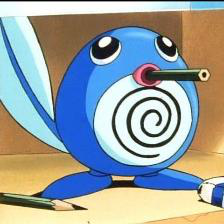

In [7]:
exampleImagePath = example["image_file_path"]


print(textLabels[example['labels']])
Image.open(exampleImagePath)


## Create a DataBlock blueprint for the training data

In [8]:
def get_x(o): return o['image_file_path']   # get the image path
def get_y(o): return textLabels[o['labels']]    # get the label

# blocks
blocks = (ImageBlock, CategoryBlock)

# add a "validation" key to each item in the dataset
dataSet['validation']  = dataSet['validation'].map(lambda x: {'image_file_path': x['image_file_path'], 'labels': x['labels'], 'is_validation': True})

dataSet['train'] = dataSet['train'].map(lambda x: {'image_file_path': x['image_file_path'], 'labels': x['labels'], 'is_validation': False})






totalTrainingSet = concat(dataSet['train'], dataSet['validation'])


# datablock
pokemons = DataBlock(blocks=blocks,
                   get_x=get_x,
                   get_y=get_y,
                   splitter=FuncSplitter(lambda o: o['is_validation']),
                   item_tfms=RandomResizedCrop(224, min_scale=0.5),
                #    batch_tfms=aug_transforms()
)


# dataloader
dls = pokemons.dataloaders(totalTrainingSet)

Map:   0%|          | 0/1390 [00:00<?, ? examples/s]

### Show a batch of training data

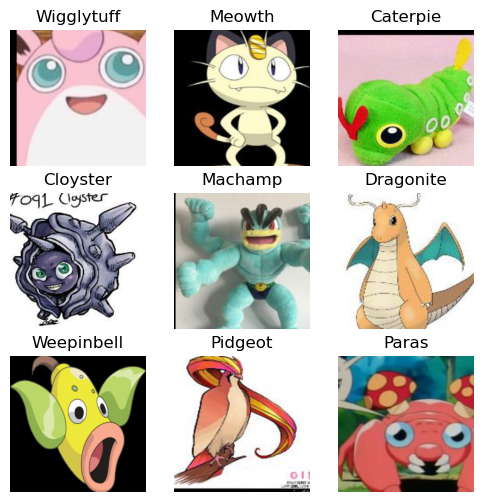

In [9]:
dls.show_batch(max_n=9, figsize=(6,6))

## Train the model

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

/Users/simonoob/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/simonoob/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,4.001923,4.754245,0.945324,01:31


/Users/simonoob/anaconda3/lib/python3.11/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.217312,3.919693,0.866187,02:01


### Show confusion matrix

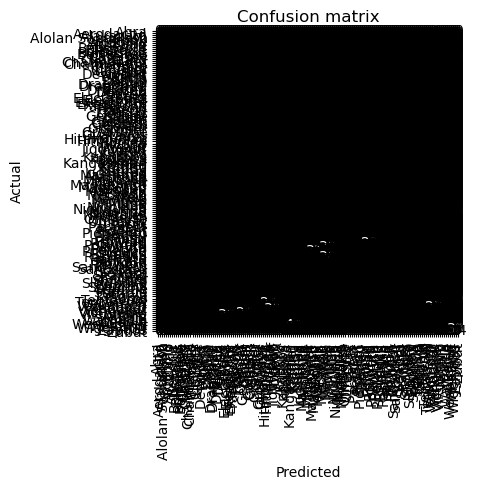

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

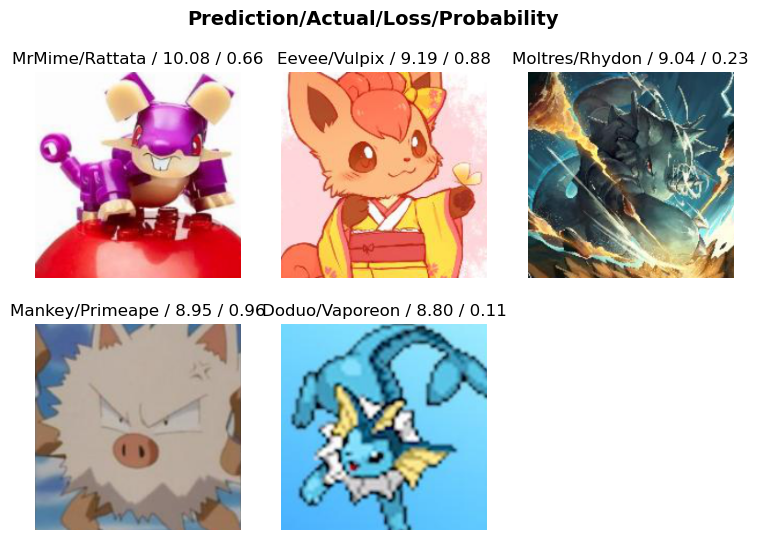

In [13]:
interp.plot_top_losses(5, nrows=2)

### Export the model to a .pkl file

In [22]:
learn.export()